<a href="https://colab.research.google.com/github/raynardj/python4ml/blob/master/experiments/gsea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single sample enrichment analysis

In [1]:
import numpy as np

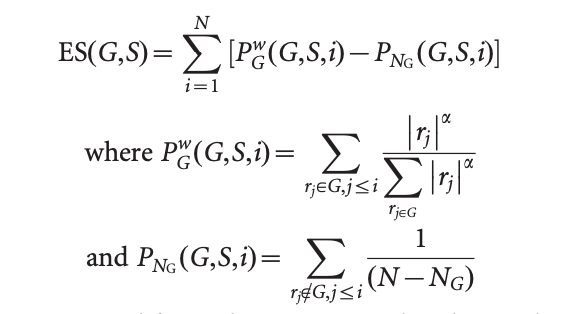

In [213]:
sample = np.random.normal(size=(250))

In [214]:
gene_set1 = np.random.choice(range(250),size=50,replace=False)
gene_set1 = gene_set1[gene_set1.argsort()]
gene_set1

array([  9,  11,  14,  18,  20,  25,  27,  28,  33,  35,  37,  40,  43,
        47,  49,  50,  51,  55,  58,  64,  65,  79,  81,  86,  87,  99,
       100, 103, 143, 150, 160, 166, 176, 177, 196, 197, 198, 205, 206,
       208, 210, 212, 213, 214, 222, 232, 233, 239, 246, 247])

In [216]:
rank = (-sample).argsort()
rank

array([247, 196,  20,  18, 177,  51,  81, 222,  11,   9,  99,  58,  27,
       100,  40,  43,  35, 212, 239, 143,  28,  86, 208, 210,  79, 233,
       206,  55,  25, 176, 232, 160,  65,  64, 214,  13, 103,  33, 213,
       198, 105, 205, 246, 150, 197,  50, 166,  47,  71, 243,  14,  36,
        48, 116, 240, 125,  29,  63,  49, 172,  59, 194,  37,  85, 184,
       101,   5, 207,  21, 180,  84,   1,  39, 144,  73,  82, 128,  54,
       187, 118,   2, 111,  89, 159, 139,  57,  87, 117, 141,  78, 106,
       225,  56, 148, 244, 217, 193, 249, 201,  96, 219, 155,  91, 183,
        19, 181, 190, 130,   6, 104, 215, 157, 182, 248, 203, 226, 115,
       200, 174, 102, 112, 186, 230, 169,  70, 204, 154, 216, 192, 164,
        41, 132,  24, 221, 114, 202, 129, 152, 149, 179, 241,  17, 168,
       147, 218, 163,  45,  22, 135, 178,  53,  23, 146,  44, 188,   0,
        68, 242,  42, 199, 220,  94,  74,  30, 108,  66, 175,   4, 209,
       227,  80, 121,  72, 170, 189, 142, 124, 224, 113, 133,  3

In [217]:
alpha = 1/4
def calc_p_wg(gene_set, rank, i):
    deno = sum(list(j**alpha for j in rank[gene_set]))
    return sum(list((j**alpha)/deno for j in rank[gene_set] if j<=i))

def calc_p_ng(gene_set, rank, i):
    return len(list(j for j in rank[rank<=i] if j not in gene_set)) * (1/(len(rank)-len(gene_set)))

Calculate p_wg, p_ng for each i

In [218]:
p_wg = []
p_ng = []
for i in range(len(rank)):
    p_wg.append(calc_p_wg(gene_set1, rank, i))
    p_ng.append(calc_p_ng(gene_set1, rank, i))

In [219]:
import pandas as pd
es_df = pd.DataFrame(dict(p_wg=p_wg, p_ng=p_ng))

In [220]:
es_df["es"] = es_df["p_wg"] - es_df["p_ng"]

In [221]:
es_df

,p_wg,p_ng,es
0,0.0,0.005,-5.000000e-03
1,0.0,0.010,-1.000000e-02
2,0.0,0.015,-1.500000e-02
3,0.0,0.020,-2.000000e-02
4,0.0,0.025,-2.500000e-02
...,...,...,...
245,1.0,0.990,1.000000e-02
246,1.0,0.990,1.000000e-02
247,1.0,0.990,1.000000e-02
248,1.0,0.995,5.000000e-03


In [222]:
from matplotlib import pyplot as plt

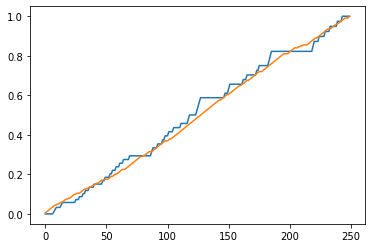

In [223]:
plt.plot(range(250), es_df["p_wg"], range(250), es_df["p_ng"])

In [224]:
es = es_df.es.sum()
es

2.424325717756035